In [1]:
from ray.rllib.agents.ppo import PPOTrainer

# from ray.rllib.agents.sac import SACTrainer
from ray.tune.registry import register_env
from ray import shutdown, init
from marketsai.economies.capital_mkts.capital_planner_ma import Capital_planner_ma
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import csv
import json

""" GLOBAL CONFIGS """
# PLot options
PLOT_PROGRESS = True
sn.color_palette("Set2")
sn.set_style("ticks")  # grid styling, "dark"
# plt.figure(figsize=(8, 4))
# choose between "paper", "talk" or "poster"
sn.set_context(
    "paper",
    # font_scale=1.4,
)
FOR_PUBLIC = False
SAVE_CSV = False
INPUT_PATH_EXPERS = "/Users/matiascovarrubias/Dropbox/RL_macro/Experiments/exp_infonative_multi_hh_cap_plan_ma_run_Aug24_PPO.json"
if FOR_PUBLIC:
    OUTPUT_PATH_EXPERS = "/Users/matiascovarrubias/Dropbox/RL_macro/Experiments/"
    OUTPUT_PATH_FIGURES = "/Users/matiascovarrubias/Dropbox/RL_macro/Documents/Figures/"
else:
    OUTPUT_PATH_EXPERS = "/Users/matiascovarrubias/Dropbox/RL_macro/Experiments/ALL/"
    OUTPUT_PATH_FIGURES = (
        "/Users/matiascovarrubias/Dropbox/RL_macro/Documents/Figures/ALL/"
    )

""" Step 0: import experiment data """
with open(INPUT_PATH_EXPERS) as f:
    exp_data_dict = json.load(f)

# UNPACK USEFUL DATA
n_agents_list = exp_data_dict["n_agents"]
exp_names = exp_data_dict["exp_names"]
checkpoints_dirs = exp_data_dict["checkpoints"]
progress_csv_dirs = exp_data_dict["progress_csv_dirs"]
best_rewards = exp_data_dict["best_rewards"]
print(best_rewards)

# checkpoint_path = "/home/mc5851/ray_results/server_5hh_capital_planner_ma_run_July21_PPO/PPO_capital_planner_ma_46ca2_00006_6_2021-07-21_14-27-16/checkpoint_225/checkpoint-225"
# checkpoint_path = "/Users/matiascovarrubias/ray_results/native_multi_capital_planner_test_July17_PPO/PPO_capital_planner_3e5e9_00000_0_2021-07-18_14-01-58/checkpoint_000050/checkpoint-50"

# init ray
shutdown()
init()

/Users/matiascovarrubias/Library/Caches/pypoetry/virtualenvs/marketsai-reVLCGV_-py3.8/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


Instructions for updating:
non-resource variables are not supported in the long term
[38.4954961870518, 32.313315482129184]


2021-08-24 18:55:49,311	INFO services.py:1267 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '192.168.1.202',
 'raylet_ip_address': '192.168.1.202',
 'redis_address': '192.168.1.202:6379',
 'object_store_address': '/tmp/ray/session_2021-08-24_18-55-47_905515_26401/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-08-24_18-55-47_905515_26401/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2021-08-24_18-55-47_905515_26401',
 'metrics_export_port': 63784,
 'node_id': '22161a386f3a2849c5ac9a5da2841082ae0e4dd407508372c4944895'}

39.8092654551279
32.75472432256146


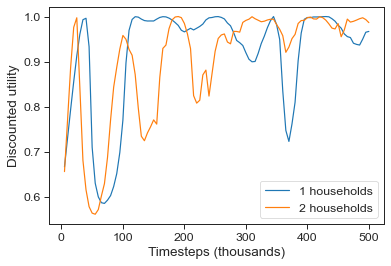

In [2]:
""" Step 1: Plot progress """

if PLOT_PROGRESS == True:
    for i in range(len(exp_names)):
        data_progress_df = pd.read_csv(progress_csv_dirs[i])
        max_rewards = data_progress_df[
            "evaluation/custom_metrics/discounted_rewards_mean"
        ].max()
        print(max_rewards)
        data_progress_df["evaluation/custom_metrics/discounted_rewards_mean"] = (
            data_progress_df["evaluation/custom_metrics/discounted_rewards_mean"]
            / max_rewards
        )
        learning_plot = sn.lineplot(
            data=data_progress_df,
            y="evaluation/custom_metrics/discounted_rewards_mean",
            x="episodes_total",
        )
    learning_plot = learning_plot.get_figure()
    plt.ylabel("Discounted utility")
    plt.xlabel("Timesteps (thousands)")
    plt.legend(labels=[f"{i+1} households" for i in range(len(n_agents_list))])
    learning_plot.savefig(OUTPUT_PATH_FIGURES + "progress_" + exp_names[-1] + ".png")

(pid=26423) WARNING:tensorflow:From /Users/matiascovarrubias/Library/Caches/pypoetry/virtualenvs/marketsai-reVLCGV_-py3.8/lib/python3.8/site-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=26423) Instructions for updating:
(pid=26423) non-resource variables are not supported in the long term
(pid=26418) WARNING:tensorflow:From /Users/matiascovarrubias/Library/Caches/pypoetry/virtualenvs/marketsai-reVLCGV_-py3.8/lib/python3.8/site-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=26418) Instructions for updating:
(pid=26418) non-resource variables are not supported in the long term
2021-08-24 19:11:35,550	INFO trainable.py:377 -- Restored on 192.168.1.202 from checkpoint: /Users/matiascovarrubias/ray_results/native_1hh_cap_pl

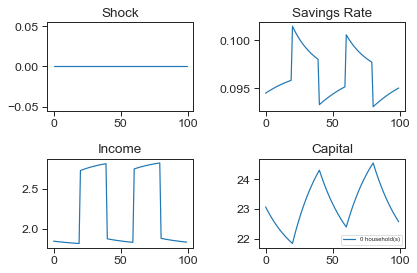

(pid=26417) WARNING:tensorflow:From /Users/matiascovarrubias/Library/Caches/pypoetry/virtualenvs/marketsai-reVLCGV_-py3.8/lib/python3.8/site-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=26417) Instructions for updating:
(pid=26417) non-resource variables are not supported in the long term
(pid=26420) WARNING:tensorflow:From /Users/matiascovarrubias/Library/Caches/pypoetry/virtualenvs/marketsai-reVLCGV_-py3.8/lib/python3.8/site-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=26420) Instructions for updating:
(pid=26420) non-resource variables are not supported in the long term
2021-08-24 19:11:39,850	INFO trainable.py:377 -- Restored on 192.168.1.202 from checkpoint: /Users/matiascovarrubias/ray_results/native_2hh_cap_pl

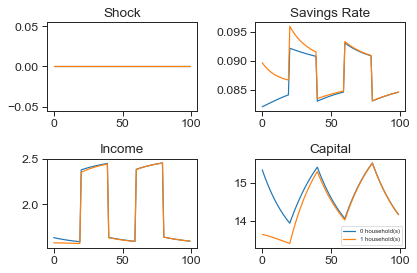

In [6]:
""" Step 2: Congif and Restore RL policy and  then simulate """
y_agg_list = [[] for i in n_agents_list]
s_agg_list = [[] for i in n_agents_list]
c_agg_list = [[] for i in n_agents_list]
k_agg_list = [[] for i in n_agents_list]
shock_agg_list = [[] for i in n_agents_list]
for ind, n_hh in enumerate(n_agents_list):
    """Step 2.0: replicate original environemnt and config"""
    env_label = "capital_planner_ma"
    register_env(env_label, Capital_planner_ma)
    env_horizon = 1000
    n_hh = n_hh
    n_capital = 1
    beta = 0.98
    env_config_analysis = {
        "horizon": 1000,
        "n_hh": n_hh,
        "n_capital": n_capital,
        "eval_mode": False,
        "analysis_mode": True,
        "max_savings": 0.6,
        "bgt_penalty": 1,
        "shock_idtc_values": [0.9, 1.1],
        "shock_idtc_transition": [[0.9, 0.1], [0.1, 0.9]],
        "shock_agg_values": [0.8, 1.2],
        "shock_agg_transition": [[0.95, 0.05], [0.05, 0.95]],
        "parameters": {"delta": 0.04, "alpha": 0.3, "phi": 0.5, "beta": beta},
    }

    # We instantiate the environment to extract information.
    env = Capital_planner_ma(env_config_analysis)
    config_analysis = {
        "gamma": beta,
        "env": env_label,
        "env_config": env_config_analysis,
        "horizon": env_horizon,
        "explore": False,
        "framework": "torch",
        "multiagent": {
            "policies": {
                "hh": (
                    None,
                    env.observation_space["hh_0"],
                    env.action_space["hh_0"],
                    {},
                ),
            },
            "policy_mapping_fn": (lambda agent_id: agent_id.split("_")[0]),
            "replay_mode": "independent",
        },
    }
    """ Step 2.1: restore trainer """

    # restore the trainer
    trained_trainer = PPOTrainer(env=env_label, config=config_analysis)
    trained_trainer.restore(checkpoints_dirs[ind])

    """ Step 2: Simulate an episode (MAX_steps timesteps) """

    env = Capital_planner_ma(env_config=env_config_analysis)
    shock_idtc_list = [[] for i in range(env.n_hh)]
    y_list = [[] for i in range(env.n_hh)]
    s_list = [[] for i in range(env.n_hh)]
    c_list = [[] for i in range(env.n_hh)]
    k_list = [[] for i in range(env.n_hh)]
    MAX_STEPS = env.horizon

    # loop
    obs = env.reset()
    for t in range(MAX_STEPS):
        action = {}
        for i in range(env.n_hh):
            action[f"hh_{i}"] = trained_trainer.compute_action(
                obs[f"hh_{i}"], policy_id="hh"
            )

        obs, rew, done, info = env.step(action)
        for i in range(env.n_hh):
            shock_idtc_list[i].append(obs["hh_0"][1][i])
            y_list[i].append(info["hh_0"]["income"][i])
            s_list[i].append(info["hh_0"]["savings"][i][0])
            c_list[i].append(info["hh_0"]["consumption"][i])
            k_list[i].append(info["hh_0"]["capital"][i][0])

        # k_agg_list.append(np.sum([k_list[[j][t-1] for j in range(env.n_hh)]))
        shock_agg_list[ind].append(obs["hh_0"][2])
        y_agg_list[ind].append(np.sum([y_list[i][t] for i in range(env.n_hh)]))
        s_agg_list[ind].append(
            np.sum([s_list[i][t] * y_list[i][t] for i in range(env.n_hh)])
            / y_agg_list[ind][t]
        )
        c_agg_list[ind].append(np.sum([y_list[i][t] for i in range(env.n_hh)]))
        k_agg_list[ind].append(np.sum([k_list[i][t] for i in range(env.n_hh)]))

    """ Step 2.2: Plot trajectories """

    # Idiosyncratic trajectories
    x = [i for i in range(100)]
    plt.subplot(2, 2, 1)
    for i in range(env.n_hh):
        sn.lineplot(x, shock_idtc_list[i][:100], label=f"{i} household(s)", legend=0)
    plt.title("Shock")

    plt.subplot(2, 2, 2)
    for i in range(env.n_hh):
        sn.lineplot(x, s_list[i][:100], label=f"{i} household(s)", legend=0)
    plt.title("Savings Rate")

    plt.subplot(2, 2, 3)
    for i in range(env.n_hh):
        sn.lineplot(x, y_list[i][:100], label=f"{i} household(s)", legend=0)
    plt.title("Income")

    plt.subplot(2, 2, 4)
    # plt.plot(k_agg_list[:100])
    for i in range(env.n_hh):
        sn.lineplot(x, k_list[i][:100], label=f"{i} household(s)", legend=0)
    plt.title("Capital")

    plt.tight_layout()
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc="lower right", prop={"size": 6})
    # plt.legend(labels=[f"{i+1} households" for i in range(env.n_hh)], loc='upper center', bbox_to_anchor=(0.5, 1.05))
    plt.savefig(OUTPUT_PATH_FIGURES + "SimInd_" + exp_names[ind] + ".png")
    plt.show()

# shutdown()

/Users/matiascovarrubias/Library/Caches/pypoetry/virtualenvs/marketsai-reVLCGV_-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/matiascovarrubias/Library/Caches/pypoetry/virtualenvs/marketsai-reVLCGV_-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/matiascovarrubias/Library/Caches/pypoetry/virtualenvs/marketsai-reVLCGV_-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y

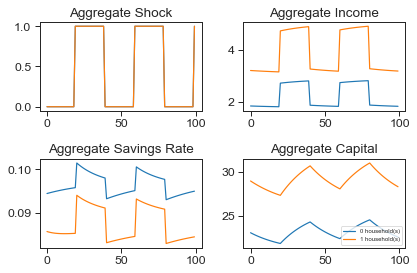

In [9]:
""" Step 3: Create aggregate plots"""

x = [i for i in range(100)]
plt.subplot(2, 2, 1)
for i in range(len(n_agents_list)):
    sn.lineplot(x, shock_agg_list[i][:100], label=f"{i} household(s)", legend=0)
plt.title("Aggregate Shock")

plt.subplot(2, 2, 2)
for i in range(len(n_agents_list)):
    sn.lineplot(x, y_agg_list[i][:100], label=f"{i} household(s)", legend=0)
plt.title("Aggregate Income")

plt.subplot(2, 2, 3)
for i in range(len(n_agents_list)):
    sn.lineplot(x, s_agg_list[i][:100], label=f"{i} household(s)", legend=0)
plt.title("Aggregate Savings Rate")

plt.subplot(2, 2, 4)
for i in range(len(n_agents_list)):
    sn.lineplot(x, k_agg_list[i][:100], label=f"{i} household(s)", legend=0)
plt.title("Aggregate Capital")

plt.tight_layout()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc="lower right", prop={"size": 6})
plt.savefig(OUTPUT_PATH_FIGURES + "SimAgg_" + exp_names[-1] + ".png")
plt.clf
plt.show()